In [1]:
import pandas as pd #Pandas es un paquete para estructuras de datos y análisis de datos.
import numpy as np #numpy es un paquete para matrices.
!pip install folium geopandas numpy
import folium #Folium es una librería para mapas.
from folium import plugins #Módulo de complementos de Folium.
from google.colab import files
import matplotlib.pyplot as plt #Módulo de Matplotlib para realizar gráficos. Matplotlib es una biblioteca para visualizaciones estáticas, dinámicas e interactivas.
import seaborn as sns #Biblioteca basada en Matplotlib para gráfico de datos.
sns.set() # Set the styles to Seaborn

In [2]:
#Esto es para acceder a los archivos de drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
path='/content/drive/MyDrive/Curso Introducción a Python, aplicado a ciencias ambientales/Proyecto/data_proyecto.xlsx'
#path='/content/drive/MyDrive/data_proyecto.xlsx'

#dat_raw= pd.read_csv(path)
data_raw=pd.read_excel(path)

data=data_raw.copy()
data
#print(data)

,Región de muestreo,Área de muestreo,Sitio de muestreo,Fecha,Latitud (° ' ''),Longitud (° ' ''),Temperatura (°C),pH,Salinidad (PSU),Clorofila a (mg.m-3)
0,Margarita,La Restinga,1,2018-01-15,"11°1'35.15""N","64°10'53.10""W",28.843873,7.904688,36.288056,0.799730
1,Margarita,La Restinga,2,2018-01-15,"11°0'52.71""N","64°9'56.76""W",28.072301,7.732033,37.743420,0.777745
2,Margarita,La Restinga,3,2018-01-15,"11°0'15.78""N","64°8'53.38""W",29.593720,7.488798,34.997775,0.745759
3,Margarita,Playa el agua,1,2018-01-15,"11°10'7.90""N","63°52'41.97""W",25.232745,7.333610,35.663181,0.612321
4,Margarita,Playa el agua,2,2018-01-15,"11°9'9.73""N","63°52'11.46""W",29.559778,8.611946,34.618873,0.580022
5,Margarita,Playa el agua,3,2018-01-15,"11°8'23.64""N","63°51'24.68""W",29.538334,8.198418,32.011398,0.283705
6,Margarita,Porlamar,1,2018-01-15,"10°56'40.96""N","63°51'43.36""W",25.346535,7.039904,32.999190,0.756512
7,Margarita,Porlamar,2,2018-01-15,"10°57'11.04""N","63°50'45.08""W",29.699208,7.805991,33.704720,0.792445
8,Margarita,Porlamar,3,2018-01-15,"10°57'18.98""N","63°49'39.70""W",25.553802,8.854081,32.330109,0.365414
9,Margarita,Punta Arenas,1,2018-01-15,"10°59'19.24""N","64°23'59.75""W",29.612945,8.759371,34.825221,0.119217


## 3. Conociendo la data  (3 ptos)

In [ ]:
data.describe(include='all')

,Región de muestreo,Área de muestreo,Sitio de muestreo,Fecha,Latitud (° ' ''),Longitud (° ' ''),Temperatura (°C),pH,Salinidad (PSU),Clorofila a (mg.m-3)
count,300,300,300.000000,300,300,300,300.000000,300.000000,300.000000,300.000000
unique,1,5,NaN,20,15,15,NaN,NaN,NaN,NaN
top,Margarita,La Restinga,NaN,2018-01-15,"11°1'35.15""N","64°10'53.10""W",NaN,NaN,NaN,NaN
freq,300,60,NaN,15,20,20,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.000000,NaN,NaN,NaN,27.463541,8.015115,34.909228,0.520460
std,NaN,NaN,0.817861,NaN,NaN,NaN,1.470178,0.582504,1.800975,0.285362
min,NaN,NaN,1.000000,NaN,NaN,NaN,25.024395,7.007237,32.009921,0.019743
25%,NaN,NaN,1.000000,NaN,NaN,NaN,26.178524,7.500730,33.279384,0.280122
50%,NaN,NaN,2.000000,NaN,NaN,NaN,27.496035,8.004051,34.829284,0.542839
75%,NaN,NaN,3.000000,NaN,NaN,NaN,28.754298,8.514610,36.418267,0.765250


In [4]:
área_de_muestreo = data['Área de muestreo']


conteo={'La Restinga': 0,
'Playa el agua': 0,
'Porlamar': 0,
'Punta Arenas': 0,
'Punta de piedras': 0}
for area in área_de_muestreo:
  if area == 'La Restinga':
    conteo['La Restinga'] += 1
  elif area == 'Playa el agua':
    conteo['Playa el agua'] += 1
  elif area == 'Porlamar':
    conteo['Porlamar'] += 1
  elif area == 'Punta Arenas':
    conteo['Punta Arenas'] += 1
  elif area == 'Punta de piedras':
    conteo['Punta de piedras'] += 1


print(conteo)

#conteo = área_de_muestreo.value_counts()
#print(conteo)





{'La Restinga': 60, 'Playa el agua': 60, 'Porlamar': 60, 'Punta Arenas': 60, 'Punta de piedras': 60}


✔️Tienes 3 puntos en esta sección.

## 4. Transformación de coordenadas

### 4.1 Crea una función para convertir coordenadas en grados minutos y segundos a grados decimales. (4 ptos)

In [4]:
#coordenadas="64°10'53'W"
#latitud_gms=input("introduzca la latitud en formato GMS")
#longitud_gms=input("introduzca la longitud en formato GMS")
latitud_gms='11°1\'35.15"N'
longitud_gms='64°10\'53.10"W'
def GMS_to_GD(latitud_gms,longitud_gms):
  """ Esta funcion toma como dominio de entrada latitud_gms y longitud_gms que son coordendas en formato GMS, luego se segmenta ambos string usando el coomando split
  y se le asigna los valores de grados, minutos y segundos a varias variables y luego transforma las coordanadas a grados decimales y los retorna en las variables
grados1 y grados2"""
  #coordenadas=input("introduzca las cordenas en formato GMS")
  parte1=latitud_gms.split('°')
  parte2=parte1[1].split("'")
  parte3=parte2[1].split('"')
  grados=int(parte1[0])
  minutos=int(parte2[0])
  segundos=float(parte3[0])
  grados_decimales=grados+minutos/60+segundos/3600   ###### Es mejor coolocar un nombre como latitud_dec a la variables grados_decimales.
  if "W"  in latitud_gms:                            ###### ❌ W corresponde a datos de longitud no de latitud.
    grados_decimales=-grados_decimales
  elif "S" in latitud_gms:
    grados_decimales=-grados_decimales
  parte4=longitud_gms.split('°')
  parte5=parte4[1].split("'")
  parte6=parte5[1].split('"')
  grados2=int(parte4[0])
  minutos2=int(parte5[0])
  segundos2=float(parte6[0])
  grados_decimales2=grados2+minutos2/60+segundos2/3600
  if "W"  in longitud_gms:
    grados_decimales2=-grados_decimales2            ###### Es mejor coolocar un nombre como longitud_dec a la variable grados_decimales2.
  elif "S" in longitud_gms:                         ###### ❌ S corresponde a datos de latitud no de longitud.
    grados_decimales2=-grados_decimales2
  return grados_decimales,grados_decimales2
grados1,grados2=GMS_to_GD(latitud_gms,longitud_gms)
print(grados1,grados2)
print(GMS_to_GD.__doc__)


11.026430555555557 -64.18141666666668
 Esta funcion toma como dominio de entrada latitud_gms y longitud_gms que son coordendas en formato GMS, luego se segmenta ambos string usando el coomando split
  y se le asigna los valores de grados, minutos y segundos a varias variables y luego transforma las coordanadas a grados decimales y los retorna en las variables
grados1 y grados2


🙂 Tienes 3 puntos en esta subsección.

### 4.2 Data de coordenadas en grados minutos y segundos. (2 ptos)

In [5]:
lat_gms_col="Latitud (° ' '')"
long_gms_col="Longitud (° ' '')"
Lat_g_col="Latitud (°)"
Long_g_col="Longitud (°)"
data=data
#print(data)
def GMS_to_GD_data(data,lat_gms_col,long_gms_col,Lat_g_col,Long_g_col):
    """
    Función para tomar y agragar coordenadas al dataframe.

    Parámetros:
    data: dataframe - dataframe del que se extraen las coordenadas originales y se guardan las coordenadas transformadas.
    lat_gms_col: str - nombre de la columna con los valores de latitud en grados, minutos y segundos
    long_gms_col: str - nombre de la columna con los valores de longitud en grados, minutos y segundos
    Lat_g_col: str - nombre de la nueva columna con valores de latitud en grados decimales
    Long_g_col: str - nombre de la nueva columna con valores de longitud en grados decimales
    """
    for i in range(len(data)):

        latitud_gms, longitud_gms = data[lat_gms_col][i], data[long_gms_col][i]

        data.loc[i,Lat_g_col],data.loc[i,Long_g_col] = GMS_to_GD(latitud_gms,longitud_gms)

    return data

#df = pd.DataFrame(data)
#GMS_to_GD_data(data,lat_gms_col,long_gms_col,Lat_g_col,Long_g_col)
#print(df.head())
#print(df.info())

In [6]:
df = pd.DataFrame(data)
GMS_to_GD_data(data,lat_gms_col,long_gms_col,Lat_g_col,Long_g_col)
print(df.head())
#print(df.info())

# 🚧 Las líneas primera y tercera no son necesarias en esta sección.
# 🚧 Para un mayor orden, recomiendo establecer los argumentos que pasarás a la función GMS_to_GD_data en esta misma celda y no en la anterior.

  Región de muestreo Área de muestreo  Sitio de muestreo       Fecha  \
0          Margarita      La Restinga                  1  2018-01-15   
1          Margarita      La Restinga                  2  2018-01-15   
2          Margarita      La Restinga                  3  2018-01-15   
3          Margarita    Playa el agua                  1  2018-01-15   
4          Margarita    Playa el agua                  2  2018-01-15   

  Latitud (° ' '') Longitud (° ' '')  Temperatura (°C)        pH  \
0     11°1'35.15"N     64°10'53.10"W         28.843873  7.904688   
1     11°0'52.71"N      64°9'56.76"W         28.072301  7.732033   
2     11°0'15.78"N      64°8'53.38"W         29.593720  7.488798   
3     11°10'7.90"N     63°52'41.97"W         25.232745  7.333610   
4      11°9'9.73"N     63°52'11.46"W         29.559778  8.611946   

   Salinidad (PSU)  Clorofila a (mg.m-3)  
0        36.288056              0.799730  
1        37.743420              0.777745  
2        34.997775           

🙂 Para un mayor orden podrías hacerlo así:

In [19]:
def GMS_to_GD_data(data,lat_gms_col,long_gms_col,Lat_g_col,Long_g_col):
    """
    Función para tomar y agragar coordenadas al dataframe.

    Parámetros:
    data: dataframe - dataframe del que se extraen las coordenadas originales y se guardan las coordenadas transformadas.
    lat_gms_col: str - nombre de la columna con los valores de latitud en grados, minutos y segundos
    long_gms_col: str - nombre de la columna con los valores de longitud en grados, minutos y segundos
    Lat_g_col: str - nombre de la nueva columna con valores de latitud en grados decimales
    Long_g_col: str - nombre de la nueva columna con valores de longitud en grados decimales
    """
    for i in range(len(data)):

        latitud_gms, longitud_gms = data[lat_gms_col][i], data[long_gms_col][i]

        data.loc[i,Lat_g_col],data.loc[i,Long_g_col] = GMS_to_GD(latitud_gms,longitud_gms)

    return data

In [20]:
lat_gms_col="Latitud (° ' '')"
long_gms_col="Longitud (° ' '')"
Lat_g_col="Latitud (°)"
Long_g_col="Longitud (°)"
#data=data Esto no es necesario porque el dataframe ya se llama "data"

GMS_to_GD_data(data,lat_gms_col,long_gms_col,Lat_g_col,Long_g_col)

,Región de muestreo,Área de muestreo,Sitio de muestreo,Fecha,Latitud (° ' ''),Longitud (° ' ''),Temperatura (°C),pH,Salinidad (PSU),Clorofila a (mg.m-3),Latitud (°),Longitud (°)
0,Margarita,La Restinga,1,2018-01-15,"11°1'35.15""N","64°10'53.10""W",28.843873,7.904688,36.288056,0.799730,11.026431,-64.181417
1,Margarita,La Restinga,2,2018-01-15,"11°0'52.71""N","64°9'56.76""W",28.072301,7.732033,37.743420,0.777745,11.014642,-64.165767
2,Margarita,La Restinga,3,2018-01-15,"11°0'15.78""N","64°8'53.38""W",29.593720,7.488798,34.997775,0.745759,11.004383,-64.148161
3,Margarita,Playa el agua,1,2018-01-15,"11°10'7.90""N","63°52'41.97""W",25.232745,7.333610,35.663181,0.612321,11.168861,-63.878325
4,Margarita,Playa el agua,2,2018-01-15,"11°9'9.73""N","63°52'11.46""W",29.559778,8.611946,34.618873,0.580022,11.152703,-63.869850
5,Margarita,Playa el agua,3,2018-01-15,"11°8'23.64""N","63°51'24.68""W",29.538334,8.198418,32.011398,0.283705,11.139900,-63.856856
6,Margarita,Porlamar,1,2018-01-15,"10°56'40.96""N","63°51'43.36""W",25.346535,7.039904,32.999190,0.756512,10.944711,-63.862044
7,Margarita,Porlamar,2,2018-01-15,"10°57'11.04""N","63°50'45.08""W",29.699208,7.805991,33.704720,0.792445,10.953067,-63.845856
8,Margarita,Porlamar,3,2018-01-15,"10°57'18.98""N","63°49'39.70""W",25.553802,8.854081,32.330109,0.365414,10.955272,-63.827694
9,Margarita,Punta Arenas,1,2018-01-15,"10°59'19.24""N","64°23'59.75""W",29.612945,8.759371,34.825221,0.119217,10.988678,-64.399931


🙂 Tienes 2 puntos en esta sección.

## 5. Mapa interactivo (6 ptos)

In [17]:
data=data
title='Mapa_de_puntos_muestrados'
columna='Área de muestreo'
legend_caption='Área de muestreo'
latmax=11.5
latmin=10.5
lonmax=-63.5
lonmin=-64.5
lat_interval=0.1
lon_interval=0.1
zoom_start=10
#colors =['#ffa51a','red','green','#da50ff','blue']
#colors=['#ffa51a','red','#008000','verde','#0000FF','blue','#FFD700', 'gold','#008000','purple']
colors=['#ffa51a','#008000','#0000FF','#FFD700','#8A2BE2']

def mapa(data,title,columna,legend_caption,latmax,latmin,lonmax,lonmin,lat_interval,lon_interval,zoom_start,colors):
    '''
    Función para crear mapas interactivos.

    Parámetros:

    data: dataframe - Data a utilizar.
    title: str - Título del mapa.
    columna: str - Nombre de la columna según la cual clasificar los datos.
    legend_caption: str - Etiqueta de la leyenda.
    latmax: float - Latitud máxima en grados decimales para la grilla.
    latmin: float - Latitud mínima en grados decimales para la grilla.
    lonmax: float - Longitud máxima en grados decimales para la grilla.
    lonmin: float - Longitud mínima en grados decimales para la grilla.
    lat_interval: float - Intérvalo entre líneas de latitud para la grilla.
    lon_interval: float - Intérvalo entre líneas de longitud para la grilla.
    zoom_start: float - Zoom inicial.
    colors: lista - Lista de colores.
    '''
    #Creamos el mapa. Aplicamos el método explore de geopandas para crear el mapa.

    lat=(latmax-latmin)/2+latmin
    lon=(lonmax-lonmin)/2+lonmin

    m=folium.Map(min_lon=lonmin,
                 max_lon=lonmax,
                 min_lat=latmin,
                 max_lat=latmax,
                 location=[lat, lon],
                 max_bounds=False,
                 min_zoom=7,
                 zoom_start=zoom_start,
                 zoom_control=False,
                 control_scale=True)

    #Tiles. Estas son las ´capas´ o 'mosaicos' que componen el mapa y que podemos ver de acuerdo a nuestra elección y al nivel de zoom.
    #Aquí colocamos tres tiles aparte de la que viene por defecto (openstreetmap).

    tile = folium.TileLayer(tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                            attr = 'Esri',
                            name = 'Esri Satellite',
                            overlay = False,
                            control = True,
                            ).add_to(m)

    tile = folium.TileLayer(tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png',
                            attr = '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
                            name = 'CartoDB.VoyagerNoLabels',
                            overlay = False,
                            control = True,
                            min_zoom=7,
                            max_zoom=20).add_to(m)


    tile = folium.TileLayer(tiles = 'http://{s}.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                            name = 'Google',
                            attr= 'ThanksToGoogleMap',
                            subdomains=['mt0','mt1','mt2','mt3'],
                            overlay = False,
                            control = True,
                            max_zoom=20).add_to(m)


    #Posición del mouse
    plugins.MousePosition().add_to(m)



    #Título

    #Características del título
    title_html = """<h1 aling = "center", style="font-family: verdana; font-size:16px;font-weight:bold; background-color: black; color: white; padding:10px; text-transform: uppercase;">{}</h1>""".format(title)

    m.get_root().html.add_child(folium.Element(title_html))


    #Agregando markers al mapa

    claves=data[columna].unique()
    colore=dict(zip(claves,colors))

    for i in data.index:
        popup=data['Área de muestreo'][i] + ', Sitio: ' + str(data['Sitio de muestreo'][i])

        folium.CircleMarker([data['Latitud (°)'][i], data['Longitud (°)'][i]],
                            radius=10,
                            fill=True,
                            fill_opacity= 0.7,
                            fill_color=colore[data[columna][i]],
                            color='black',
                            popup=folium.Popup(popup,max_width=200)).add_to(m)




    #Grilla
    attr = {'fill': 'white', 'font-weight': 'bold', 'font-size': '20','stroke':"black"}


    for lon in np.arange(lonmin, lonmax+0.0001, lon_interval):
        line=folium.PolyLine([[latmin, lon],[latmax, lon]], weight=1, tooltip=str(round(lon,5)), color='white')
        wind_textpath = plugins.PolyLineTextPath(line,
                                                 str(round(lon,5)),
                                                 below=True,
                                                 offset=-5,
                                                 attributes=attr)
        m.add_child(line)
        m.add_child(wind_textpath)

    for lat in np.arange(latmin, latmax+0.0001, lat_interval):
        line=folium.PolyLine([[lat, lonmin],[lat, lonmax]], weight=1, tooltip=str(round(lat,5)),color='white')
        wind_textpath = plugins.PolyLineTextPath(line,
                                                 str(round(lat,5)),
                                                 below=True,
                                                 offset=-5,
                                                 attributes=attr)
        m.add_child(line)
        m.add_child(wind_textpath)


    #Legenda

    items=list()
    item_txt = """<br> &nbsp; <i class="fas fa-circle fas-2x" style="color:{col}; border: 2px solid black; border-radius: 50%; padding: 0px"></i> {item}"""
    serie=data[columna].drop_duplicates(keep='last').sort_values()
    for i in range(len(serie)):
        globals()['html_itms_'+serie.iloc[i].replace(' ','_')] = item_txt.format( item= serie.iloc[i] , col= colore[serie.iloc[i]])
        items.append(globals()['html_itms_'+serie.iloc[i].replace(' ','_')])

    font_size=30

    width=(serie.str.len().max()+2)*2*font_size/3
    height=(len(serie)+1)*8*font_size/5

    legend_html = '<div style="width:'+str(width)+'px; height:'+str(height)+'px; border:2px solid grey; z-index:9999; background-color:white; opacity: .85; font-size:'+str(font_size)+'px; font-weight: bold;"> &nbsp;'
    legend_html= legend_html + legend_caption

    for i in items:
        legend_html= legend_html +i
    legend_html= legend_html + "</div>"

    legend_html.format( title = 'legend_caption')

    folium.map.Marker([latmin + (latmax-latmin)/2, lonmax+0.05*(lonmax-lonmin)],
                      draggable=True,
                      icon=folium.features.DivIcon(icon_size=(width,height),
                                   icon_anchor=(0,0),
                                   html=legend_html)).add_to(m)



    #Norte

    url = ("https://github.com/AndresEdSu/Mapas/blob/main/Norte%20DEF.png?raw=true")
    folium.map.Marker([latmax -  0.1*(latmax-latmin), lonmax-0.1*(lonmax-lonmin)],
                      draggable=True,
                      icon=folium.features.CustomIcon(icon_image=url,
                                                      icon_size=(1.5*70,1.5*90),
                                                      icon_anchor=(50,50))).add_to(m)


    #Minimapa
    mmap1=plugins.MiniMap(position='topleft',width=300, height=450,zoom_level_offset=-5,toggle_display=True)
    mmap1.add_to(m)



    #Layercontrol
    folium.LayerControl().add_to(m)

    #Guardar mapa
    m.save(title+'.html')

    return m

mapa(data,title,columna,legend_caption,latmax,latmin,lonmax,lonmin,lat_interval,lon_interval,zoom_start,colors)

🙂 Aquí también veo que falta ordenar un poco. Es mejor definir la función en una celda y luego aplicarla en otra celda, como te indico a continuación:

In [21]:
def mapa(data,title,columna,legend_caption,latmax,latmin,lonmax,lonmin,lat_interval,lon_interval,zoom_start,colors):
    '''
    Función para crear mapas interactivos.

    Parámetros:

    data: dataframe - Data a utilizar.
    title: str - Título del mapa.
    columna: str - Nombre de la columna según la cual clasificar los datos.
    legend_caption: str - Etiqueta de la leyenda.
    latmax: float - Latitud máxima en grados decimales para la grilla.
    latmin: float - Latitud mínima en grados decimales para la grilla.
    lonmax: float - Longitud máxima en grados decimales para la grilla.
    lonmin: float - Longitud mínima en grados decimales para la grilla.
    lat_interval: float - Intérvalo entre líneas de latitud para la grilla.
    lon_interval: float - Intérvalo entre líneas de longitud para la grilla.
    zoom_start: float - Zoom inicial.
    colors: lista - Lista de colores.
    '''
    #Creamos el mapa. Aplicamos el método explore de geopandas para crear el mapa.

    lat=(latmax-latmin)/2+latmin
    lon=(lonmax-lonmin)/2+lonmin

    m=folium.Map(min_lon=lonmin,
                 max_lon=lonmax,
                 min_lat=latmin,
                 max_lat=latmax,
                 location=[lat, lon],
                 max_bounds=False,
                 min_zoom=7,
                 zoom_start=zoom_start,
                 zoom_control=False,
                 control_scale=True)

    #Tiles. Estas son las ´capas´ o 'mosaicos' que componen el mapa y que podemos ver de acuerdo a nuestra elección y al nivel de zoom.
    #Aquí colocamos tres tiles aparte de la que viene por defecto (openstreetmap).

    tile = folium.TileLayer(tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                            attr = 'Esri',
                            name = 'Esri Satellite',
                            overlay = False,
                            control = True,
                            ).add_to(m)

    tile = folium.TileLayer(tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png',
                            attr = '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
                            name = 'CartoDB.VoyagerNoLabels',
                            overlay = False,
                            control = True,
                            min_zoom=7,
                            max_zoom=20).add_to(m)


    tile = folium.TileLayer(tiles = 'http://{s}.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
                            name = 'Google',
                            attr= 'ThanksToGoogleMap',
                            subdomains=['mt0','mt1','mt2','mt3'],
                            overlay = False,
                            control = True,
                            max_zoom=20).add_to(m)


    #Posición del mouse
    plugins.MousePosition().add_to(m)



    #Título

    #Características del título
    title_html = """<h1 aling = "center", style="font-family: verdana; font-size:16px;font-weight:bold; background-color: black; color: white; padding:10px; text-transform: uppercase;">{}</h1>""".format(title)

    m.get_root().html.add_child(folium.Element(title_html))


    #Agregando markers al mapa

    claves=data[columna].unique()
    colore=dict(zip(claves,colors))

    for i in data.index:
        popup=data['Área de muestreo'][i] + ', Sitio: ' + str(data['Sitio de muestreo'][i])

        folium.CircleMarker([data['Latitud (°)'][i], data['Longitud (°)'][i]],
                            radius=10,
                            fill=True,
                            fill_opacity= 0.7,
                            fill_color=colore[data[columna][i]],
                            color='black',
                            popup=folium.Popup(popup,max_width=200)).add_to(m)




    #Grilla
    attr = {'fill': 'white', 'font-weight': 'bold', 'font-size': '20','stroke':"black"}


    for lon in np.arange(lonmin, lonmax+0.0001, lon_interval):
        line=folium.PolyLine([[latmin, lon],[latmax, lon]], weight=1, tooltip=str(round(lon,5)), color='white')
        wind_textpath = plugins.PolyLineTextPath(line,
                                                 str(round(lon,5)),
                                                 below=True,
                                                 offset=-5,
                                                 attributes=attr)
        m.add_child(line)
        m.add_child(wind_textpath)

    for lat in np.arange(latmin, latmax+0.0001, lat_interval):
        line=folium.PolyLine([[lat, lonmin],[lat, lonmax]], weight=1, tooltip=str(round(lat,5)),color='white')
        wind_textpath = plugins.PolyLineTextPath(line,
                                                 str(round(lat,5)),
                                                 below=True,
                                                 offset=-5,
                                                 attributes=attr)
        m.add_child(line)
        m.add_child(wind_textpath)


    #Legenda

    items=list()
    item_txt = """<br> &nbsp; <i class="fas fa-circle fas-2x" style="color:{col}; border: 2px solid black; border-radius: 50%; padding: 0px"></i> {item}"""
    serie=data[columna].drop_duplicates(keep='last').sort_values()
    for i in range(len(serie)):
        globals()['html_itms_'+serie.iloc[i].replace(' ','_')] = item_txt.format( item= serie.iloc[i] , col= colore[serie.iloc[i]])
        items.append(globals()['html_itms_'+serie.iloc[i].replace(' ','_')])

    font_size=30

    width=(serie.str.len().max()+2)*2*font_size/3
    height=(len(serie)+1)*8*font_size/5

    legend_html = '<div style="width:'+str(width)+'px; height:'+str(height)+'px; border:2px solid grey; z-index:9999; background-color:white; opacity: .85; font-size:'+str(font_size)+'px; font-weight: bold;"> &nbsp;'
    legend_html= legend_html + legend_caption

    for i in items:
        legend_html= legend_html +i
    legend_html= legend_html + "</div>"

    legend_html.format( title = 'legend_caption')

    folium.map.Marker([latmin + (latmax-latmin)/2, lonmax+0.05*(lonmax-lonmin)],
                      draggable=True,
                      icon=folium.features.DivIcon(icon_size=(width,height),
                                   icon_anchor=(0,0),
                                   html=legend_html)).add_to(m)



    #Norte

    url = ("https://github.com/AndresEdSu/Mapas/blob/main/Norte%20DEF.png?raw=true")
    folium.map.Marker([latmax -  0.1*(latmax-latmin), lonmax-0.1*(lonmax-lonmin)],
                      draggable=True,
                      icon=folium.features.CustomIcon(icon_image=url,
                                                      icon_size=(1.5*70,1.5*90),
                                                      icon_anchor=(50,50))).add_to(m)


    #Minimapa
    mmap1=plugins.MiniMap(position='topleft',width=300, height=450,zoom_level_offset=-5,toggle_display=True)
    mmap1.add_to(m)



    #Layercontrol
    folium.LayerControl().add_to(m)

    #Guardar mapa
    m.save(title+'.html')

    return m

In [22]:
data=data
title='Mapa_de_puntos_muestrados'
columna='Área de muestreo'
legend_caption='Área de muestreo'
latmax=11.5
latmin=10.5
lonmax=-63.5
lonmin=-64.5
lat_interval=0.1
lon_interval=0.1
zoom_start=10
#colors =['#ffa51a','red','green','#da50ff','blue']
#colors=['#ffa51a','red','#008000','verde','#0000FF','blue','#FFD700', 'gold','#008000','purple']
colors=['#ffa51a','#008000','#0000FF','#FFD700','#8A2BE2']



mapa(data,title,columna,legend_caption,latmax,latmin,lonmax,lonmin,lat_interval,lon_interval,zoom_start,colors)

🙂 Tienes 6 puntos en esta sección. Pero recuerda que debes cuidar el orden.

## 6. Gráficos (5 ptos)

In [7]:
data_mean=data.copy()

data_mean=data_mean.groupby(['Área de muestreo','Fecha'])[['Temperatura (°C)', 'pH', 'Salinidad (PSU)', 'Clorofila a (mg.m-3)']].mean()

data_mean

Temperatura (°C)        pH  Salinidad (PSU)  \
Área de muestreo Fecha                                                     
La Restinga      2018-01-15         28.836631  7.708506        36.343084   
                 2018-04-15         27.290460  8.556773        35.236912   
                 2018-07-15         26.924365  7.806075        35.501846   
                 2018-10-15         28.228930  8.432923        35.084744   
                 2019-01-15         26.821301  8.252422        35.737035   
                 2019-04-15         28.175705  8.078311        34.823602   
                 2019-07-15         27.010782  7.886146        33.987717   
                 2019-10-15         26.887914  8.486356        36.621851   
                 2020-01-15         27.375183  8.102042        35.995726   
                 2020-04-15         26.506012  7.946547        32.423910   
                 2020-07-15         27.897990  7.937613        34.782204   
                 2020-10-15         28.219295  7.819566        36.614002   
                 2021-01-15         26.930550  8.042160        33.444882   
                 2021-04-15         28.298754  8.197247        34.472848   
                 2021-07-15         26.007326  8.507295        33.102024   
                 2021-10-15         26.786870  8.482296        33.858143   
                 2022-01-15         26.043327  8.723050        34.157893   
                 2022-04-15         27.841964  7.787762        35.275749   
                 2022-07-15         28.482892  8.045062        33.600866   
                 2022-10-15         27.525079  8.043964        34.929479   
Playa el agua    2018-01-15         28.110286  8.047991        34.097817   
                 2018-04-15         28.039392  8.557767        34.884361   
                 2018-07-15         28.432300  8.544009        35.277318   
                 2018-10-15         27.268584  7.842335        34.162329   
                 2019-01-15         27.632495  7.927880        36.394954   
                 2019-04-15         27.405121  8.072372        34.716761   
                 2019-07-15         27.648103  7.818888        35.643671   
                 2019-10-15         26.935319  8.559048        34.685834   
                 2020-01-15         27.977007  8.014309        35.217621   
                 2020-04-15         27.042381  8.536146        34.537869   
                 2020-07-15         27.707742  8.305433        35.276372   
                 2020-10-15         27.539547  7.212086        35.007458   
                 2021-01-15         26.790911  7.980145        34.427976   
                 2021-04-15         27.647136  7.360896        33.793885   
                 2021-07-15         28.525100  8.331281        34.998833   
                 2021-10-15         27.047565  8.066014        35.086657   
                 2022-01-15         26.074481  7.270386        35.930201   
                 2022-04-15         27.033241  7.781144        34.964845   
                 2022-07-15         27.268050  7.330106        35.799157   
                 2022-10-15         28.717645  7.671952        33.339611   
Porlamar         2018-01-15         26.866515  7.899992        33.011339   
                 2018-04-15         26.776203  7.763162        35.320371   
                 2018-07-15         27.160100  8.824905        33.638358   
                 2018-10-15         25.991215  8.401463        34.531054   
                 2019-01-15         27.993622  7.987283        36.810254   
                 2019-04-15         27.846330  8.495294        33.326564   
                 2019-07-15         27.236834  8.293129        33.293591   
                 2019-10-15         27.699079  8.019571        35.853827   
                 2020-01-15         28.472771  8.055952        34.333553   
                 2020-04-15         26.451535  7.777813        33.908809   
                 2020-07-15         25.842016  8.078452        34.506497   
 

{'La Restinga': '#ffa51a', 'Playa el agua': '#008000', 'Porlamar': '#0000FF', 'Punta Arenas': '#FFD700', 'Punta de piedras': '#8A2BE2'}


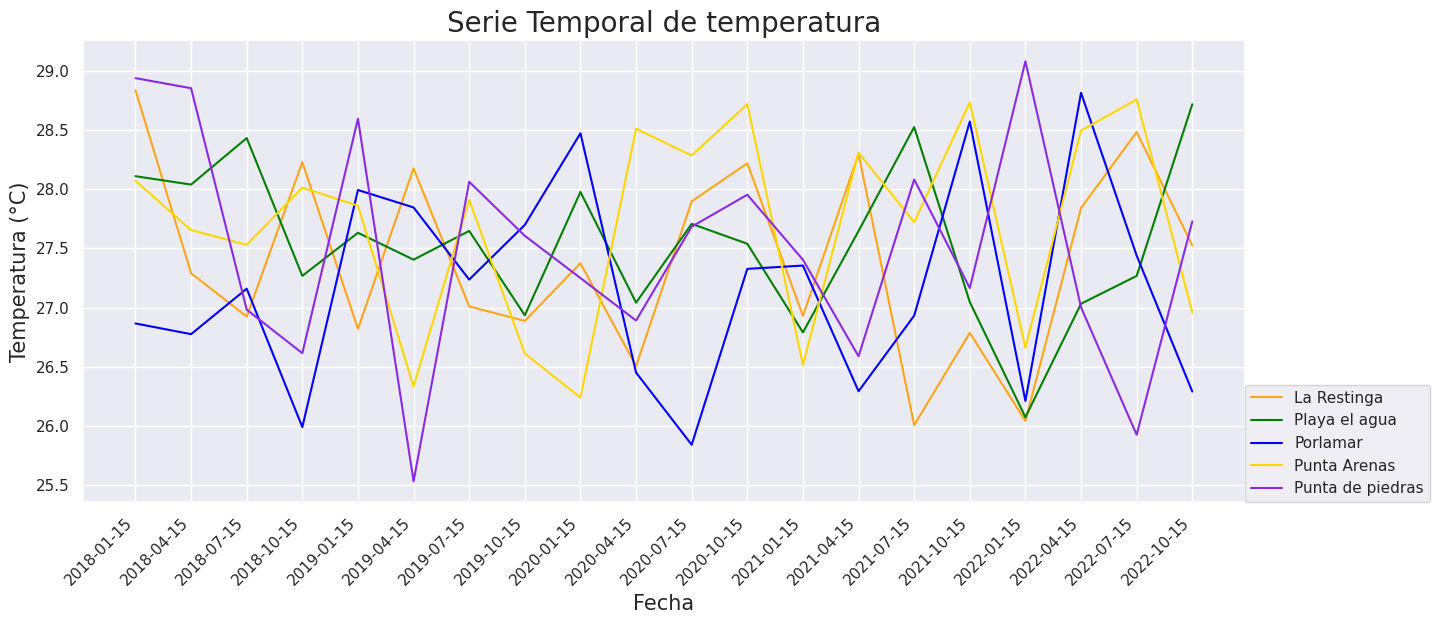

In [13]:

dt=data_mean
variable='Temperatura (°C)'
title='Serie Temporal de temperatura'
colors=['#ffa51a','#008000','#0000FF','#FFD700','#8A2BE2']
# Obtener los valores únicos de la columna "Área de muestreo"
areas_de_muestreo = dt.index.get_level_values("Área de muestreo").unique()
colore = dict(zip(areas_de_muestreo, colors))
print(colore)
def serie_temporal(dt,variable,title,colors):
    '''
    Función realizar serie de tiempo.

    Parámetros:

    dt: dataframe - Data a utilizar.
    variable: str - Nombre de la columna con los datos de la variable de interés.
    title: str - Título del gráfico.
    colors: dict - Diccionario de colores por área de muestreo
    '''
    #Creamos la figura y asignamos dimensiones
    plt.figure(figsize=(15,6))


    #Realizamos las series de tiempo
    for area in data_mean.index.get_level_values("Área de muestreo").unique():
          plt.plot(dt[variable][area].index, dt[variable][area], label=area,color=colore[area])


    # Etiquetamos los ejes
    plt.xlabel('Fecha', fontsize=15)
    plt.ylabel(variable, fontsize=15)

    #Rotamos los valores del eje x
    plt.xticks(rotation=45, ha='right')

    #Colocamos la leyenda y la ubicamos convenientemente
    plt.legend(loc=(1,0))

    #Colocamos el título
    plt.title(title,fontsize=20)

    #Esto es para guardar la imagen
    plt.savefig(title+'.jpg', bbox_inches='tight')

    plt.show
serie_temporal(dt,variable,title,colors)




🙂 Para un mayor orden te recomiendo separar la celda anterior en dos celdas. Además, noto que el parámetro colors realmente no lo estás utilizando dentro de la función. A pesar de que sí funciona, porque definiste colore antes de definir la función, estableciste un parámetro que no estás usando. Una mejor práctica es definir colore dentro de la función a partir del parámetro colors:

In [14]:
def serie_temporal(dt,variable,title,colors):
    '''
    Función realizar serie de tiempo.

    Parámetros:

    dt: dataframe - Data a utilizar.
    variable: str - Nombre de la columna con los datos de la variable de interés.
    title: str - Título del gráfico.
    colors: dict - Diccionario de colores por área de muestreo
    '''
    #Creamos la figura y asignamos dimensiones
    plt.figure(figsize=(15,6))

    # Obtener los valores únicos de la columna "Área de muestreo"
    areas_de_muestreo = dt.index.get_level_values("Área de muestreo").unique()
    colore = dict(zip(areas_de_muestreo, colors))


    #Realizamos las series de tiempo
    for area in data_mean.index.get_level_values("Área de muestreo").unique():
          plt.plot(dt[variable][area].index, dt[variable][area], label=area,color=colore[area])


    # Etiquetamos los ejes
    plt.xlabel('Fecha', fontsize=15)
    plt.ylabel(variable, fontsize=15)

    #Rotamos los valores del eje x
    plt.xticks(rotation=45, ha='right')

    #Colocamos la leyenda y la ubicamos convenientemente
    plt.legend(loc=(1,0))

    #Colocamos el título
    plt.title(title,fontsize=20)

    #Esto es para guardar la imagen
    plt.savefig(title+'.jpg', bbox_inches='tight')

    plt.show

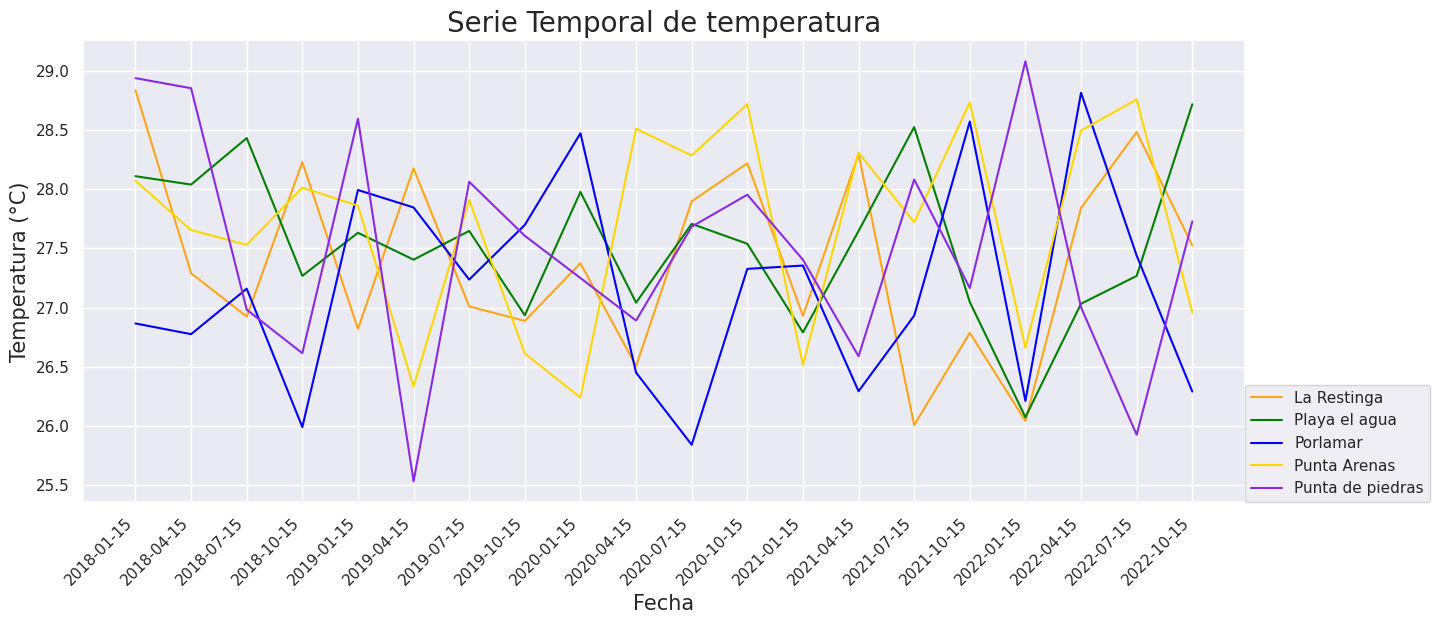

In [15]:
dt=data_mean
variable='Temperatura (°C)'
title='Serie Temporal de temperatura'
colors=['#ffa51a','#008000','#0000FF','#FFD700','#8A2BE2']

serie_temporal(dt,variable,title,colors)

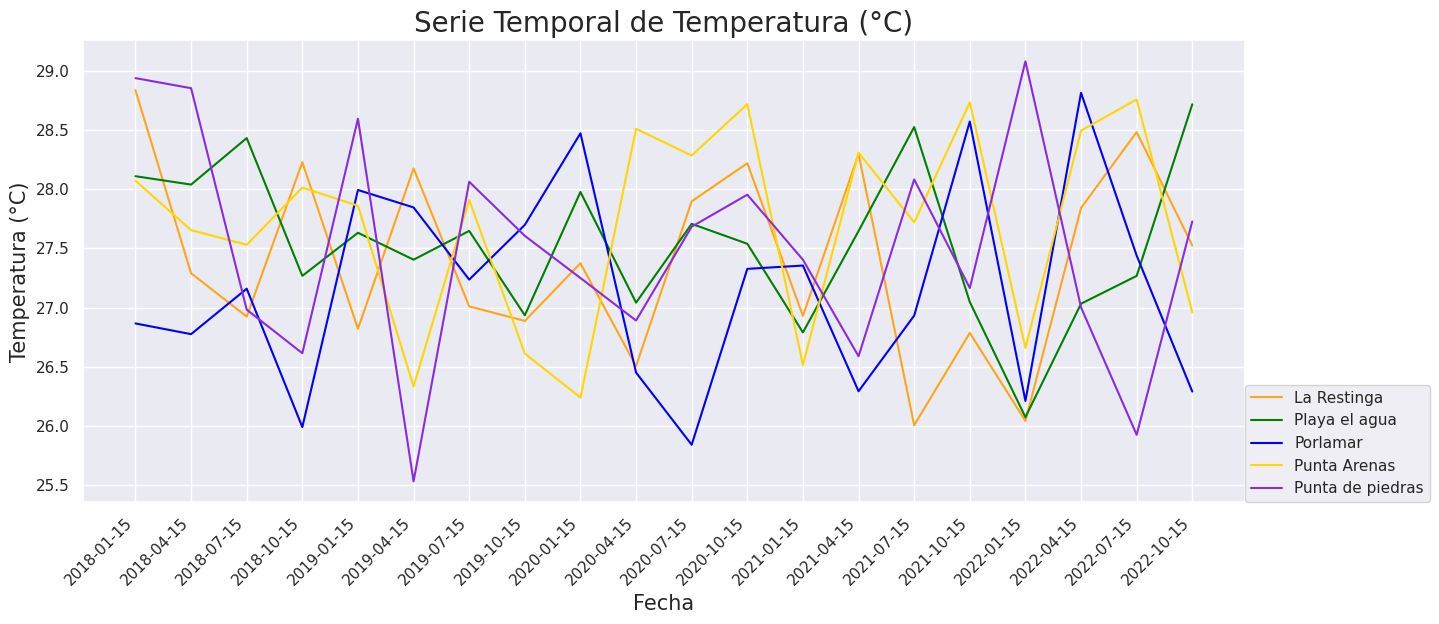

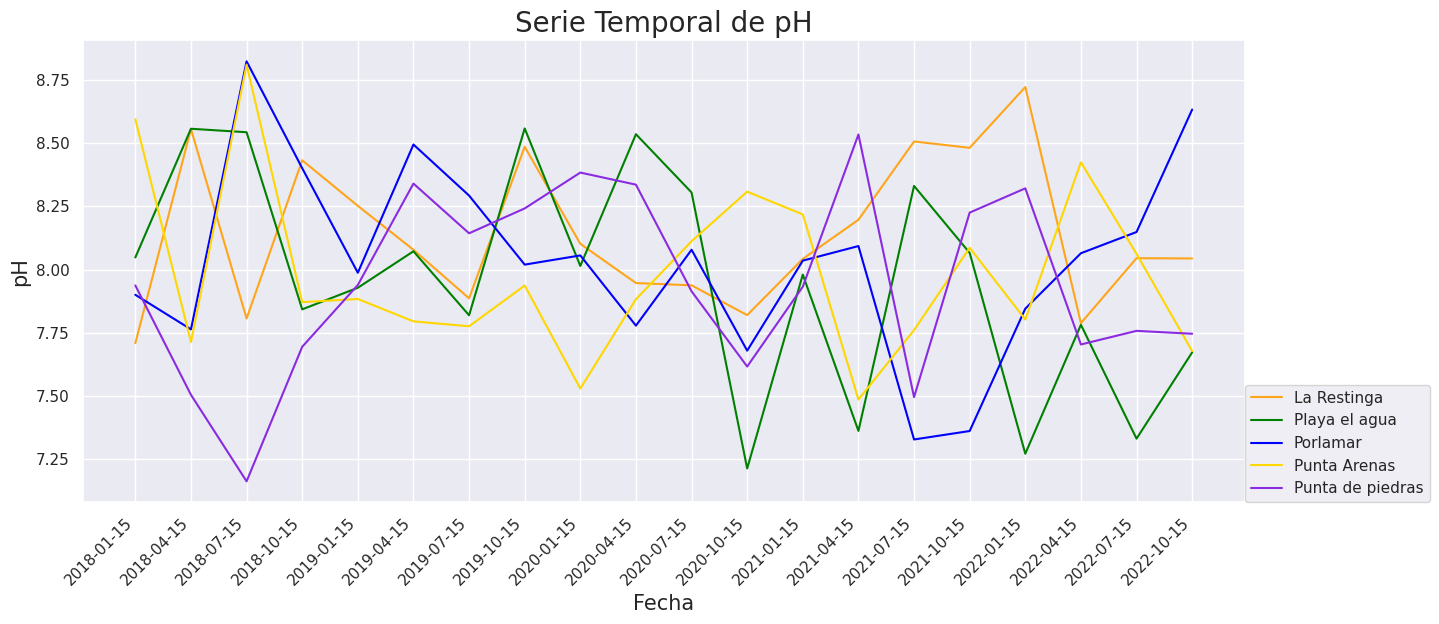

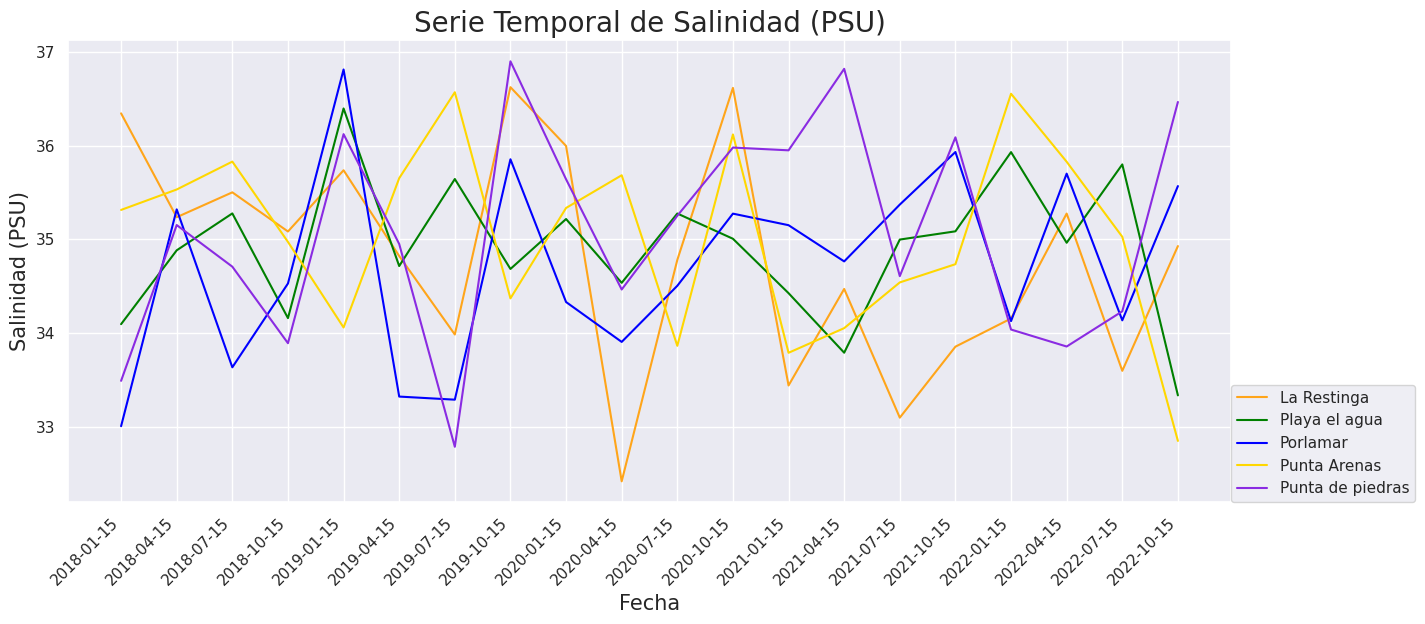

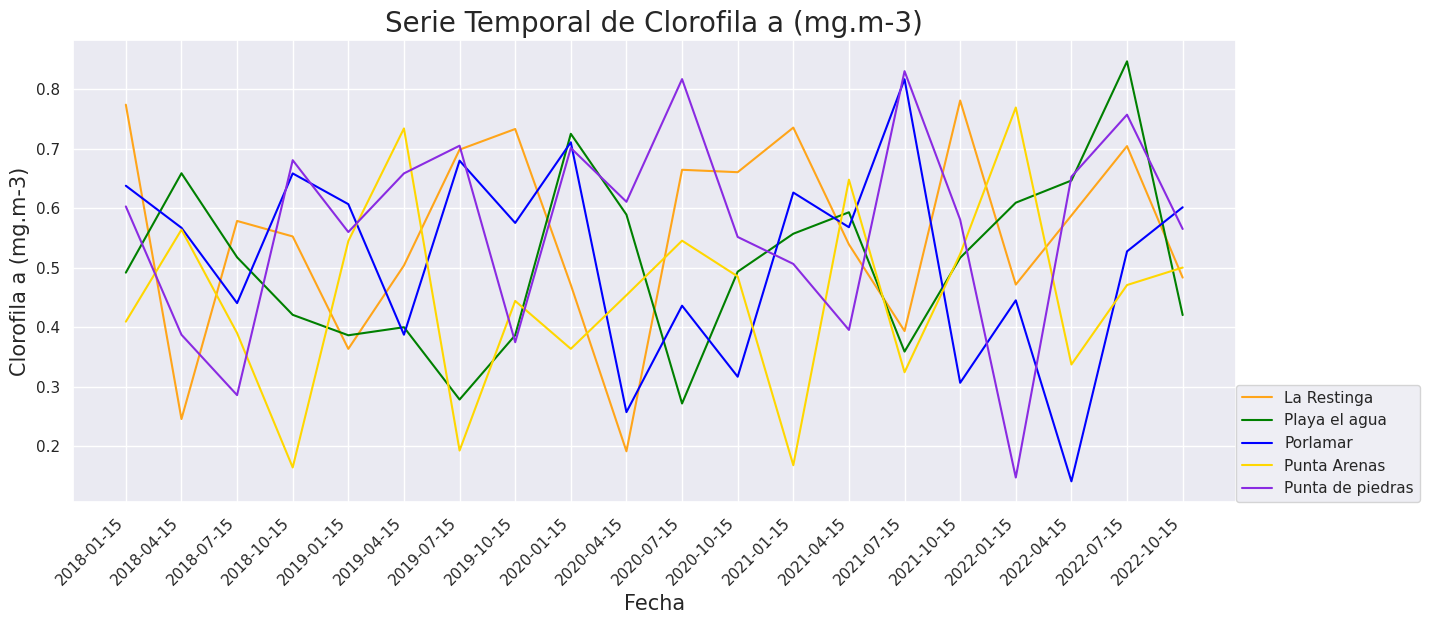

In [16]:
variables = ['Temperatura (°C)', 'pH', 'Salinidad (PSU)', 'Clorofila a (mg.m-3)']
for variable in variables:
  title = f'Serie Temporal de {variable}'
  serie_temporal(dt, variable, title, colors)#colore) ## Aquí cambién colore por colors para que funcionara bien de acuerdo a la modificación que realicé.

🙂 Tienes 4 puntos en esta sección.

Nota: 18